<a href="https://colab.research.google.com/github/zuzannazak/PhD2022Bialowieza/blob/main/%F0%9F%92%96projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ðŸ’–***Projekt z ekonometrii***ðŸ’–

**Authors:**

Wiktoria Rakowska

Monika WesoÅ‚owska

Zuzanna Å»ak


**Data:**
*   Aggregated in https://github.com/zuzannazak/random-files-i-need-sometimes/blob/main/bialowieza.xls :
  *   Chrzty, Å›luby i zgony w parafii prawosÅ‚wanej Å›w. MikoÅ‚aja CudotwÃ³rcy w BiaÅ‚owieÅ¼y https://github.com/pbiecek/SmarterPoland_blog/tree/master/dane/Bialowieza/
  *   Population data for BiaÅ‚owieÅ¼a, rural gmina, from Bank Danych Lokalnych
  *   Population data for Poland https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/struktura-ludnosci,16,1.html 
  *   Religious practices in Poland https://cbos.pl/SPISKOM.POL/2020/K_063_20.PDF 

# ***introduction***



*   BiaÅ‚owieÅ¼a i trochÄ™ o historii miasta
*   Fajne dane urywajace siÄ™ na 2012 (tutaj moÅ¼na wpleÅ›Ä‡ teÅ¼ niektÃ³re wykresy z sekcji visualization (zmieniÄ‡ kolejnoÅ›Ä‡ blokÃ³w strzaÅ‚kami i wrzuciÄ‡ je pomiÄ™dzy bloki tekstu)
*   Projekt - dokoÅ„czenie tych danych, czyli predykcja dalszych maÅ‚Å¼eÅ„stw, chrztÃ³w i zgonÃ³w
*   Dodatkowe dane: dane na temat maÅ‚Å¼eÅ„stw, urodzeÅ„ i zgonÃ³w z gminy, populacja polski, saldo migracji
*   consideration: religijnoÅ›Ä‡ w polsce, przewidujemy rejestr koÅ›cielny (cerkiewny) wiÄ™c w przypadku spadku religijnoÅ›ci moÅ¼na spodziewaÄ‡ siÄ™ spadek tych wartoÅ›ci w rejestrze, nawet jeÅ›li dane cywilne tego nie pokazujÄ…



# ***package import***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

sns.set_palette("Set2")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# ***data download***

In [3]:
#original BiaÅ‚owieÅ¼a data
url_data = (r'https://raw.github.com/pbiecek/SmarterPoland_blog/master/dane/Bialowieza/bialowieza.xls')
df = pd.read_excel(url_data)

df.head()

rok  chrzest  slub  zgon
0  1878     62.0   2.0  44.0
1  1879     77.0  14.0  38.0
2  1880     79.0  14.0  60.0
3  1881      NaN   NaN   NaN
4  1882     86.0  17.0  52.0

In [4]:
#aggregated data
url_data = (r'https://github.com/zuzannazak/random-files-i-need-sometimes/blob/49f2717618bf867b22213dd08ee8efd5ab565a1b/bialowieza.xls?raw=true')
df_aggregateddata = pd.read_excel(url_data)

df_aggregateddata.tail(10)

rok  ...  CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy
138  2016  ...                                     5.0
139  2017  ...                                     5.0
140  2018  ...                                     6.0
141  2019  ...                                     6.0
142  2020  ...                                     7.0
143  2021  ...                                     NaN
144  2022  ...                                     NaN
145  2023  ...                                     NaN
146  2024  ...                                     NaN
147  2025  ...                                     NaN

[10 rows x 13 columns]

In [5]:
df_aggregateddata.drop(df_aggregateddata.tail(5).index,inplace=True)
df_aggregateddata

rok  ...  CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy
0    1878  ...                                     NaN
1    1879  ...                                     NaN
2    1880  ...                                     NaN
3    1881  ...                                     NaN
4    1882  ...                                     NaN
..    ...  ...                                     ...
138  2016  ...                                     5.0
139  2017  ...                                     5.0
140  2018  ...                                     6.0
141  2019  ...                                     6.0
142  2020  ...                                     7.0

[143 rows x 13 columns]

#***data visualisation*** 

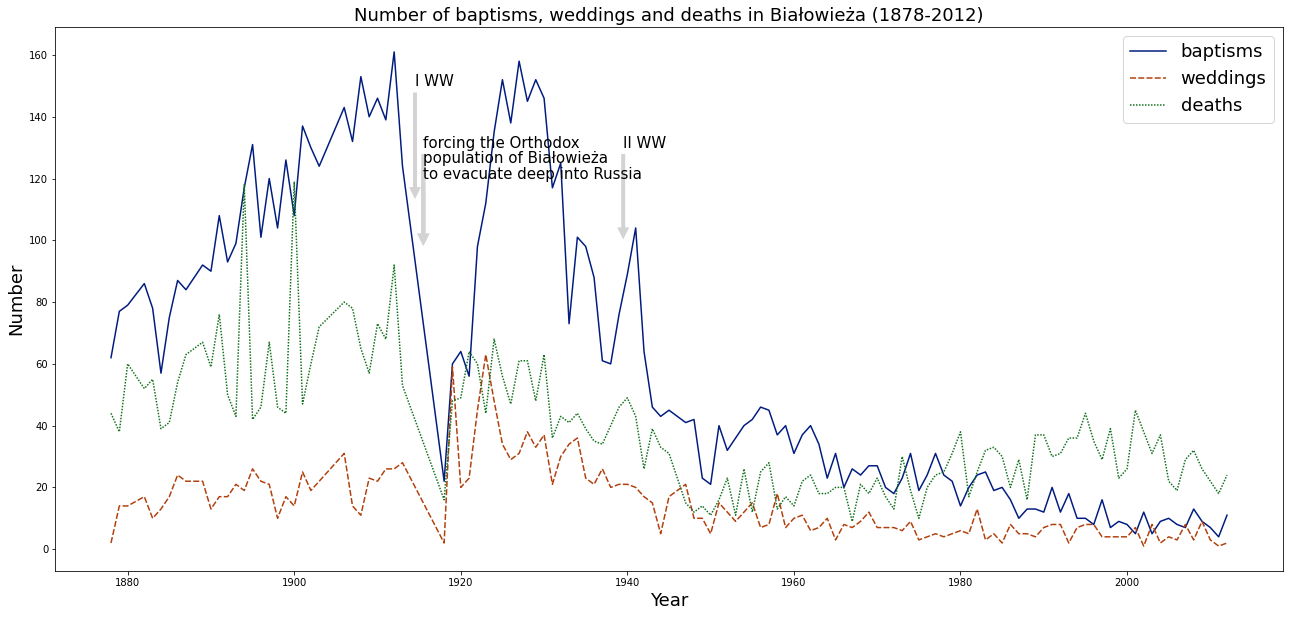

In [6]:
url_data = (r'https://github.com/zuzannazak/PhD2022Bialowieza/blob/main/bialowieza_visualisation.xlsx?raw=true')
DF = pd.read_excel(url_data)
plt.figure(figsize=(22,10))
plt.title("Number of baptisms, weddings and deaths in BiaÅ‚owieÅ¼a (1878-2012)", fontsize=18)
g=sns.lineplot(x=DF["rok"], y=DF["liczba odnotowanych"], hue=DF["zdarzenie"], style=DF["zdarzenie"], palette='dark', legend=True, ci=True)

plt.annotate('I WW', xy=(1914.5, 113), xytext=(1914.5, 150), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('II WW', xy=(1939.5, 100), xytext=(1939.5, 130), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('forcing the Orthodox', xy=(1915.5, 98), xytext=(1915.5, 130), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('population of BiaÅ‚owieÅ¼a', xy=(1915.5, 98), xytext=(1915.5, 125), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.annotate('to evacuate deep into Russia', xy=(1915.5, 98), xytext=(1915.5, 120), fontsize=15, arrowprops=dict(facecolor='lightgrey', shrink=0.01, linewidth=0))
plt.ylabel('Number', fontsize=18)
plt.xlabel('Year',fontsize=18 )
plt.legend(fontsize=18 )

sns.set_style("whitegrid")
#plt.style.use('fivethirtyeight')
sns.set_theme()



Text(0.5, 0, 'Event')

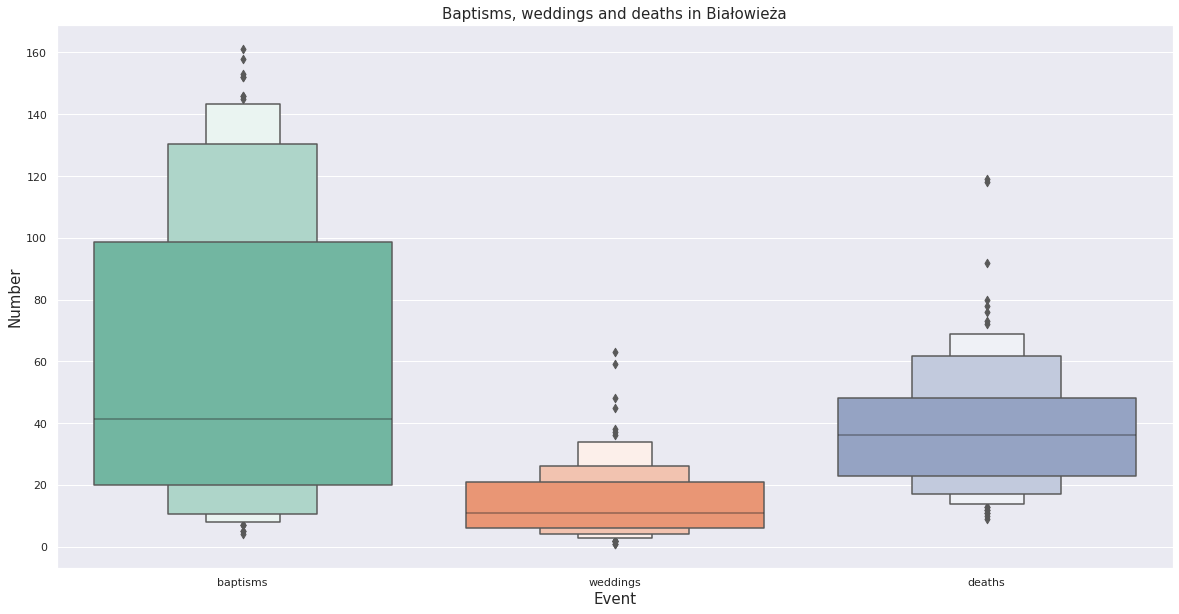

In [7]:
plt.figure(figsize=(20, 10))
sns.boxenplot(x=DF["zdarzenie"], y=DF["liczba odnotowanych"], palette="Set2")
plt.title("Baptisms, weddings and deaths in BiaÅ‚owieÅ¼a",fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xlabel('Event',fontsize=15 )


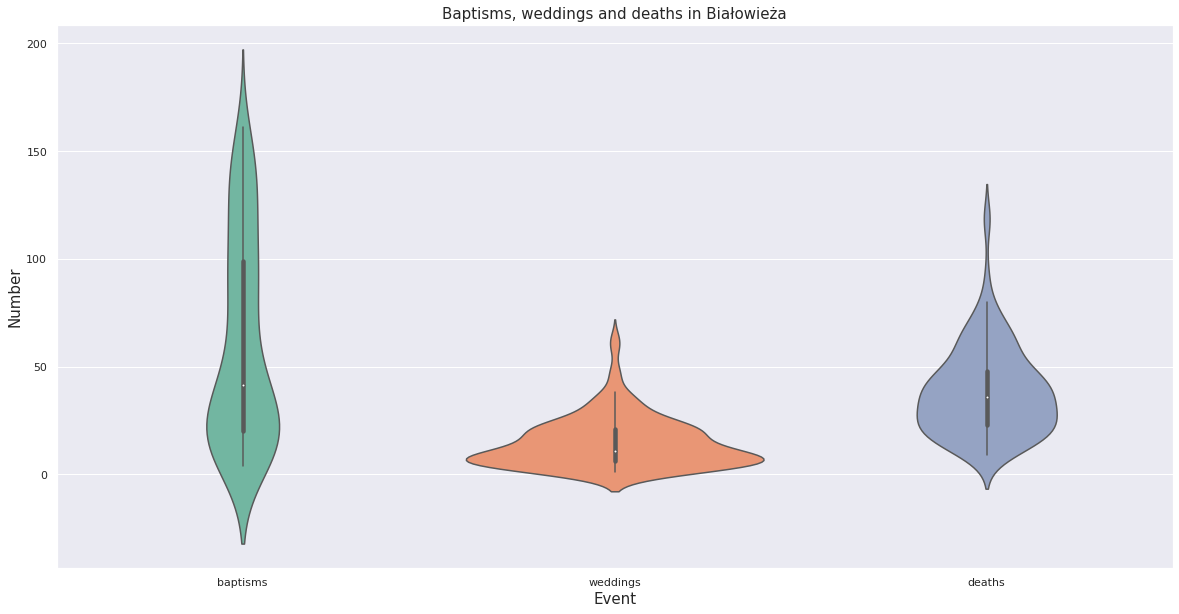

In [8]:
plt.figure(figsize=(20, 10))
sns.violinplot(x=DF["zdarzenie"], y=DF["liczba odnotowanych"], palette="Set2")
plt.title("Baptisms, weddings and deaths in BiaÅ‚owieÅ¼a",fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xlabel('Event',fontsize=15 )

plt.show()

Text(0.5, 0, 'Event')

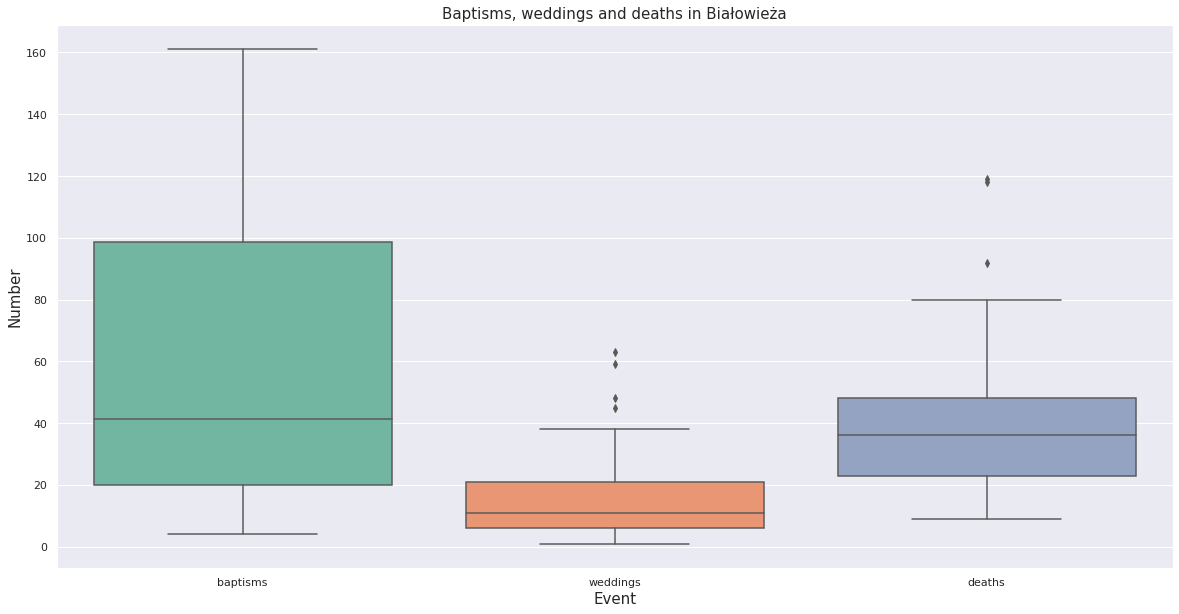

In [9]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=DF["zdarzenie"], y=DF["liczba odnotowanych"], palette="Set2")
plt.title("Baptisms, weddings and deaths in BiaÅ‚owieÅ¼a",fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xlabel('Event',fontsize=15 )

# ***analysis***

##***dependency analysis***

Text(0.5, 0.98, 'dependency analysis')

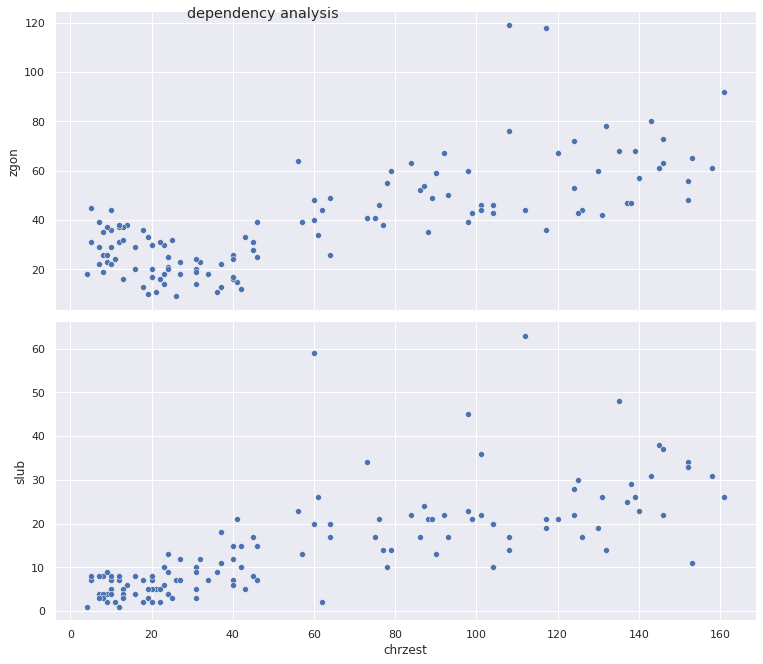

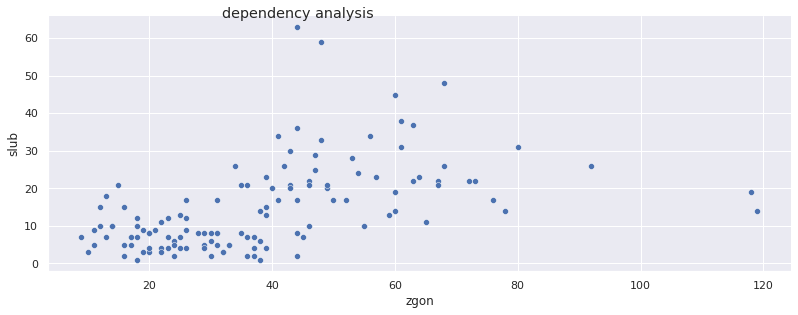

In [10]:
g=sns.pairplot(df, x_vars=["chrzest"], y_vars=["zgon", "slub"])
g.fig.suptitle("dependency analysis")
g.fig.set_size_inches(15,10)
g=sns.pairplot(df, x_vars=["zgon"], y_vars=["slub"])
g.fig.set_size_inches(15,5)
g.fig.suptitle("dependency analysis")

## **correlation**

In [11]:
#correlation
korel = df_aggregateddata.corr()
df_aggregateddata.corr()

rok  ...  CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy
rok                                                1.000000  ...                                0.923629
chrzest                                           -0.800298  ...                               -0.123442
slub                                              -0.571327  ...                               -0.348871
zgon                                              -0.630441  ...                               -0.564912
GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie                 -0.165181  ...                               -0.248697
GUS - saldo migracji ogÃ³Å‚em                        0.105424  ...                                0.026213
GUS - LudnoÅ›Ä‡ w gminie                            -0.978255  ...                               -0.925625
GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)  0.917230  ...                                0.762666
GUS - urodzenia Å¼ywe w gminie                     -0.609959  ...                               -0.429872
GUS - zgony w gminie                              -0.530095  ...                               -0.388005
CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie       -0.930674  ...                               -0.940103
CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie     0.897718  ...                                0.901986
CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy             0.923629  ...                                1.000000

[13 rows x 13 columns]

## **filling in data gaps**
There is a large amount of data gaps in the dataset. This is mostly due to the fact that variables from other sources than orthodox church records weren't available as early as 1878.

In [12]:
#data gaps
df_aggregateddata.isnull().sum()


rok                                                    0
chrzest                                               17
slub                                                  17
zgon                                                  17
GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie                    117
GUS - saldo migracji ogÃ³Å‚em                          117
GUS - LudnoÅ›Ä‡ w gminie                               117
GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)     73
GUS - urodzenia Å¼ywe w gminie                        117
GUS - zgony w gminie                                 117
CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie          119
CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie       119
CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy               119
dtype: int64

In [13]:
CORREL = df_aggregateddata.corr()
CORREL['chrzest'].to_frame().sort_values('chrzest')
CORREL = df_aggregateddata.corr()
CORREL['slub'].to_frame().sort_values('slub')
CORREL = df_aggregateddata.corr()
CORREL['zgon'].to_frame().sort_values('zgon')
CORREL = df_aggregateddata.corr()
CORREL['GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie'].to_frame().sort_values('GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie')
CORREL = df_aggregateddata.corr()
CORREL['GUS - saldo migracji ogÃ³Å‚em'].to_frame().sort_values('GUS - saldo migracji ogÃ³Å‚em')
CORREL = df_aggregateddata.corr()
CORREL['GUS - LudnoÅ›Ä‡ w gminie'].to_frame().sort_values('GUS - LudnoÅ›Ä‡ w gminie')
CORREL = df_aggregateddata.corr()
CORREL['GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)'].to_frame().sort_values('GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)')
CORREL = df_aggregateddata.corr()
CORREL['GUS - urodzenia Å¼ywe w gminie'].to_frame().sort_values('GUS - urodzenia Å¼ywe w gminie')
CORREL = df_aggregateddata.corr()
CORREL['GUS - zgony w gminie'].to_frame().sort_values('GUS - zgony w gminie')
CORREL = df_aggregateddata.corr()
CORREL['CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie'].to_frame().sort_values('CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie')
CORREL = df_aggregateddata.corr()
CORREL['CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie'].to_frame().sort_values('CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie')
CORREL = df_aggregateddata.corr()
CORREL['CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy'].to_frame().sort_values('CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy')

CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy
CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie                                     -0.940103
GUS - LudnoÅ›Ä‡ w gminie                                                          -0.925625
zgon                                                                            -0.564912
GUS - urodzenia Å¼ywe w gminie                                                   -0.429872
GUS - zgony w gminie                                                            -0.388005
slub                                                                            -0.348871
GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie                                               -0.248697
chrzest                                                                         -0.123442
GUS - saldo migracji ogÃ³Å‚em                                                      0.026213
GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)                                0.762666
CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie                                   0.901986
rok                                                                              0.923629
CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy                                           1.000000

In [14]:
df_aggregateddata['chrzest'] = df_aggregateddata.groupby('zgon')['chrzest'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['chrzest'].fillna(method='ffill', inplace=True)  
df_aggregateddata['zgon'] = df_aggregateddata.groupby('GUS - zgony w gminie')['zgon'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['zgon'].fillna(method='ffill', inplace=True)  
df_aggregateddata['slub'] = df_aggregateddata.groupby('chrzest')['slub'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['slub'].fillna(method='ffill', inplace=True)  
df_aggregateddata['GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie'] = df_aggregateddata.groupby('GUS - urodzenia Å¼ywe w gminie')['GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - saldo migracji ogÃ³Å‚em'] = df_aggregateddata.groupby('GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)')['GUS - saldo migracji ogÃ³Å‚em'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - saldo migracji ogÃ³Å‚em'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - LudnoÅ›Ä‡ w gminie'] = df_aggregateddata.groupby('CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie')['GUS - LudnoÅ›Ä‡ w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - LudnoÅ›Ä‡ w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)'] = df_aggregateddata.groupby('rok')['GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - urodzenia Å¼ywe w gminie'] = df_aggregateddata.groupby('GUS - LudnoÅ›Ä‡ w gminie')['GUS - urodzenia Å¼ywe w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - urodzenia Å¼ywe w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['GUS - zgony w gminie'] = df_aggregateddata.groupby('zgon')['GUS - zgony w gminie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['GUS - zgony w gminie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie'] = df_aggregateddata.groupby('GUS - LudnoÅ›Ä‡ w gminie')['CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie'] = df_aggregateddata.groupby('CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy')['CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie'].fillna(method='ffill', inplace=True) 
df_aggregateddata['CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy'] = df_aggregateddata.groupby('rok')['CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy'].apply(lambda x: x.ffill().bfill())
df_aggregateddata['CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy'].fillna(method='ffill', inplace=True) 


df_aggregateddata.to_csv(r'fillna_data_bialowieza.csv', index = False)

In [15]:
df_aggregateddata.isnull().sum()

rok                                                    0
chrzest                                                0
slub                                                   0
zgon                                                 117
GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie                    117
GUS - saldo migracji ogÃ³Å‚em                          117
GUS - LudnoÅ›Ä‡ w gminie                               119
GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)     72
GUS - urodzenia Å¼ywe w gminie                        119
GUS - zgony w gminie                                 117
CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie          119
CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie       119
CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy               119
dtype: int64

In [16]:
df_aggregateddata.dropna(inplace=True)
df_aggregateddata.to_csv(r'df_bialowieza.csv', index = False)

In [17]:
df_aggregateddata

rok  ...  CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy
119  1997  ...                                     3.0
120  1998  ...                                     3.0
121  1999  ...                                     3.0
122  2000  ...                                     3.0
123  2001  ...                                     3.0
124  2002  ...                                     3.0
125  2003  ...                                     3.0
126  2004  ...                                     3.0
127  2005  ...                                     3.0
128  2006  ...                                     4.0
129  2007  ...                                     3.0
130  2008  ...                                     4.0
131  2009  ...                                     4.0
132  2010  ...                                     5.0
133  2011  ...                                     5.0
134  2012  ...                                     5.0
135  2013  ...                                     5.0
136  2014  ...                                     6.0
137  2015  ...                                     6.0
138  2016  ...                                     5.0
139  2017  ...                                     5.0
140  2018  ...                                     6.0
141  2019  ...                                     6.0
142  2020  ...                                     7.0

[24 rows x 13 columns]

## **Regression**

In [18]:
X = df_aggregateddata.iloc[:, df_aggregateddata.columns != "chrzest"]
Y = df_aggregateddata["chrzest"].values.reshape(-1,1)
linear_regressor = LinearRegression().fit(X, Y)
Y_pred = linear_regressor.predict(X)

In [19]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     1.209
Date:                Wed, 26 Jan 2022   Prob (F-statistic):              0.380
Time:                        08:28:18   Log-Likelihood:                -47.872
No. Observations:                  24   AIC:                             121.7
Df Residuals:                      11   BIC:                             137.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

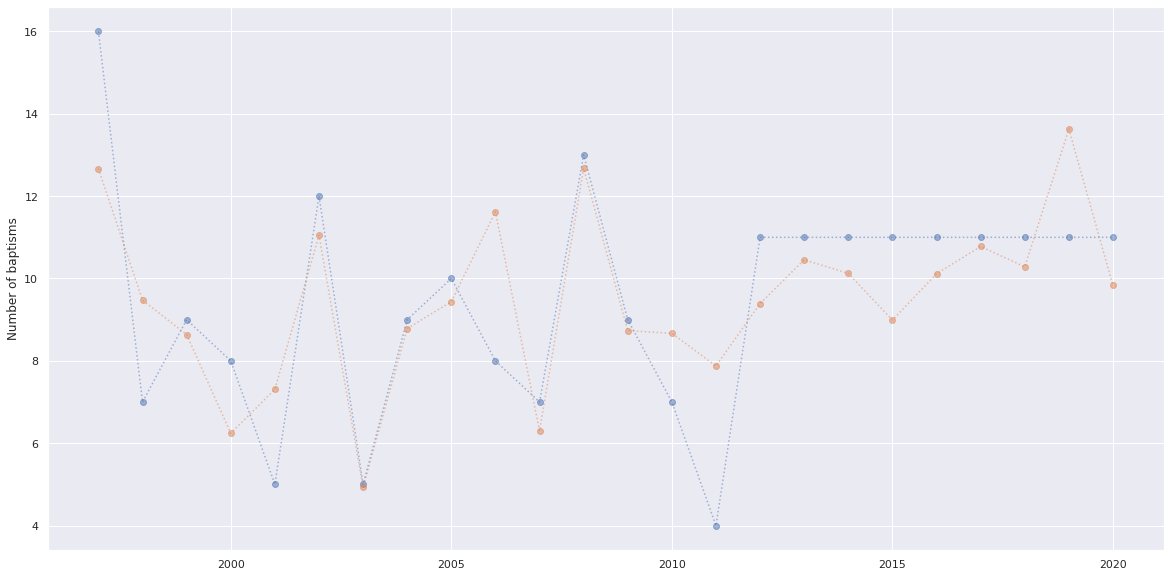

In [21]:
df_aggregateddata['Y_pred'] = Y_pred
fig, ax = plt.subplots()
ax.plot((df_aggregateddata["rok"]), df_aggregateddata["chrzest"],marker='o',alpha=0.5, linestyle='dotted')
ax.plot((df_aggregateddata["rok"]), df_aggregateddata["Y_pred"],marker='o',alpha=0.5, linestyle='dotted')
ax.set_ylabel('Number of baptisms')
fig.set_size_inches(20, 10)

## **PCA**


In [22]:
%load_ext rpy2.ipython

In [23]:
%%R
install.packages("AMR")
install.packages("readr")
install.packages("readxl")
install.packages("devtools")
install.packages("ggplot2")

R[write to console]: Installing package into â€˜/usr/local/lib/R/site-libraryâ€™
(as â€˜libâ€™ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/AMR_1.8.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2436653 bytes (2.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

In [24]:
%%R
library(AMR)
library(readr)
library(readxl)
library(devtools)
library(ggplot2)

R[write to console]: Loading required package: usethis

R[write to console]: Want to understand how all the pieces fit together? Read R for Data
Science: https://r4ds.had.co.nz/



In [25]:
%%R
df_PCA <- read_csv("df_bialowieza.csv")

Rows: 24 Columns: 13
â”€â”€ Column specification â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€â”€
Delimiter: ","
dbl (13): rok, chrzest, slub, zgon, GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie, GUS -...

â„¹ Use `spec()` to retrieve the full column specification for this data.
â„¹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [26]:
%%R
summary(df_PCA)

      rok          chrzest           slub            zgon     
 Min.   :1997   Min.   : 4.00   Min.   :1.000   Min.   :18.0  
 1st Qu.:2003   1st Qu.: 7.75   1st Qu.:2.000   1st Qu.:24.0  
 Median :2008   Median :10.50   Median :2.500   Median :26.0  
 Mean   :2008   Mean   : 9.50   Mean   :3.458   Mean   :27.5  
 3rd Qu.:2014   3rd Qu.:11.00   3rd Qu.:4.000   3rd Qu.:29.5  
 Max.   :2020   Max.   :16.00   Max.   :9.000   Max.   :45.0  
 GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie GUS - saldo migracji ogÃ³Å‚em
 Min.   : 5.00                     Min.   :-27.000            
 1st Qu.: 9.00                     1st Qu.: -6.000            
 Median :11.00                     Median :  3.500            
 Mean   :10.79                     Mean   :  4.792            
 3rd Qu.:13.00                     3rd Qu.: 10.250            
 Max.   :18.00                     Max.   : 83.000            
 GUS - LudnoÅ›Ä‡ w gminie GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)
 Min.   :2130           Min.   :381

In [27]:
%%R
cor(df_PCA)

                                                         rok     chrzest
rok                                                1.0000000  0.22449988
chrzest                                            0.2244999  1.00000000
slub                                              -0.4321265 -0.41637422
zgon                                              -0.4648515 -0.08128855
GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie                 -0.2247524  0.14064745
GUS - saldo migracji ogÃ³Å‚em                        0.1456564  0.08218159
GUS - LudnoÅ›Ä‡ w gminie                            -0.9725013 -0.14989587
GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)  0.5971602  0.09659023
GUS - urodzenia Å¼ywe w gminie                     -0.5731061  0.14715552
GUS - zgony w gminie                              -0.3467813  0.06800070
CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie       -0.9306745 -0.24625279
CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie     0.8977182  0.20432575
CBOS - % NiewierzÄ…cy i niepraktykujÄ

In [28]:
%%R
pc <- prcomp(df_PCA, center = TRUE, scale = FALSE)
summary(pc)

Importance of components:
                            PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     275.9265 92.4753 20.2221 7.49359 5.91409 3.27465 2.72248
Proportion of Variance   0.8935  0.1004  0.0048 0.00066 0.00041 0.00013 0.00009
Cumulative Proportion    0.8935  0.9938  0.9986 0.99928 0.99969 0.99982 0.99991
                           PC8     PC9    PC10    PC11   PC12   PC13
Standard deviation     1.99317 1.52888 0.97872 0.69220 0.4741 0.2833
Proportion of Variance 0.00005 0.00003 0.00001 0.00001 0.0000 0.0000
Cumulative Proportion  0.99995 0.99998 0.99999 1.00000 1.0000 1.0000


In [29]:
%%R
pc

Standard deviations (1, .., p=13):
 [1] 275.9264675  92.4752533  20.2220896   7.4935915   5.9140933   3.2746487
 [7]   2.7224838   1.9931722   1.5288833   0.9787185   0.6921954   0.4740936
[13]   0.2833238

Rotation (n x k) = (13 x 13):
                                                           PC1           PC2
rok                                                0.024069313 -2.200931e-02
chrzest                                            0.001461658 -1.125873e-03
slub                                              -0.004299380 -7.025104e-03
zgon                                              -0.012222536 -9.246949e-04
GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie                 -0.003295828 -7.873499e-03
GUS - saldo migracji ogÃ³Å‚em                        0.010765942  1.423118e-02
GUS - LudnoÅ›Ä‡ w gminie                            -0.904526378  4.243270e-01
GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)  0.424788262  9.047537e-01
GUS - urodzenia Å¼ywe w gminie                     -0.0140114

In [30]:
%%R
df.detr.pc <- prcomp(df_PCA, center = TRUE, scale = TRUE)
summary(df.detr.pc)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6    PC7
Standard deviation     2.555 1.3088 1.1939 1.07696 0.88503 0.76866 0.5746
Proportion of Variance 0.502 0.1318 0.1096 0.08922 0.06025 0.04545 0.0254
Cumulative Proportion  0.502 0.6338 0.7435 0.83268 0.89293 0.93838 0.9638
                           PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     0.47604 0.34116 0.22893 0.20738 0.15588 0.09054
Proportion of Variance 0.01743 0.00895 0.00403 0.00331 0.00187 0.00063
Cumulative Proportion  0.98121 0.99016 0.99419 0.99750 0.99937 1.00000


In [31]:
%%R
df.detr.pc

Standard deviations (1, .., p=13):
 [1] 2.55470503 1.30884612 1.19389618 1.07695985 0.88503146 0.76865711
 [7] 0.57458212 0.47603675 0.34115678 0.22893152 0.20738459 0.15588394
[13] 0.09054082

Rotation (n x k) = (13 x 13):
                                                          PC1          PC2
rok                                                0.36580938  0.044977885
chrzest                                            0.08794661  0.030222182
slub                                              -0.23377372  0.289829391
zgon                                              -0.22072949 -0.351934213
GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie                 -0.14293424  0.581549442
GUS - saldo migracji ogÃ³Å‚em                        0.08625071 -0.456295055
GUS - LudnoÅ›Ä‡ w gminie                            -0.37636039 -0.057669019
GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.)  0.31597810 -0.006439592
GUS - urodzenia Å¼ywe w gminie                     -0.22186960  0.268182280
GUS - zgony w gm

In [32]:
%%R
df.detr.pc$sdev


 [1] 2.55470503 1.30884612 1.19389618 1.07695985 0.88503146 0.76865711
 [7] 0.57458212 0.47603675 0.34115678 0.22893152 0.20738459 0.15588394
[13] 0.09054082


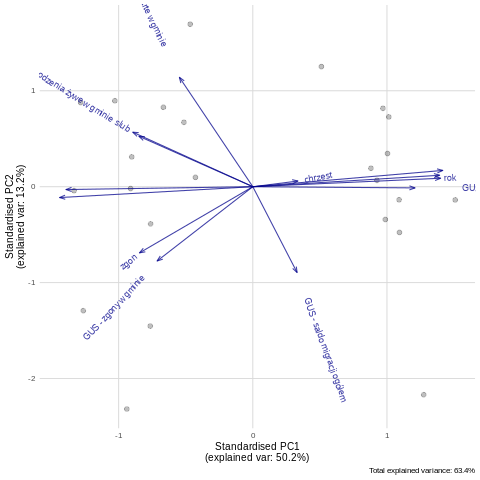

In [33]:
%%R
ggplot_pca(df.detr.pc)

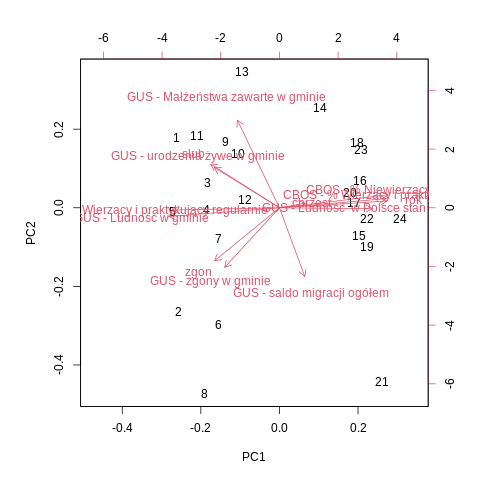

In [34]:
%%R
biplot(df.detr.pc)

## Factor analysis

In [35]:
%%R 
install.packages("psych")

R[write to console]: Installing package into â€˜/usr/local/lib/R/site-libraryâ€™
(as â€˜libâ€™ is unspecified)

R[write to console]: also installing the dependencies â€˜tmvnsimâ€™, â€˜mnormtâ€™


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tmvnsim_1.0-2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 6052 bytes

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

In [36]:
%%R
library(psych)

R[write to console]: 
Attaching package: â€˜psychâ€™


R[write to console]: The following objects are masked from â€˜package:ggplot2â€™:

    %+%, alpha


R[write to console]: The following object is masked from â€˜package:AMRâ€™:

    pca




In [37]:
%%R

EFA_Model <- fa(df_PCA)
print(EFA_Model)

Factor Analysis using method =  minres
Call: fa(r = df_PCA)
Standardized loadings (pattern matrix) based upon correlation matrix
                                                    MR1    h2    u2 com
rok                                               -0.94 0.884 0.116   1
chrzest                                           -0.20 0.039 0.961   1
slub                                               0.54 0.291 0.709   1
zgon                                               0.51 0.258 0.742   1
GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie                  0.32 0.100 0.900   1
GUS - saldo migracji ogÃ³Å‚em                       -0.19 0.035 0.965   1
GUS - LudnoÅ›Ä‡ w gminie                             0.98 0.955 0.045   1
GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.) -0.77 0.595 0.405   1
GUS - urodzenia Å¼ywe w gminie                      0.51 0.263 0.737   1
GUS - zgony w gminie                               0.42 0.179 0.821   1
CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie        0.94 0.876 0.124

In [38]:
%%R
EFA_Model$loadings


Loadings:
                                                  MR1   
rok                                               -0.940
chrzest                                           -0.198
slub                                               0.540
zgon                                               0.508
GUS - MaÅ‚Å¼eÅ„stwa zawarte w gminie                  0.316
GUS - saldo migracji ogÃ³Å‚em                       -0.187
GUS - LudnoÅ›Ä‡ w gminie                             0.977
GUS - LudnoÅ›Ä‡  w Polsce stan w dniu 31.XII (tys.) -0.771
GUS - urodzenia Å¼ywe w gminie                      0.513
GUS - zgony w gminie                               0.423
CBOS - % WierzÄ…cy i praktykujÄ…cy regularnie        0.936
CBOS - % WierzÄ…cy i praktykujÄ…cy nieregularnie    -0.934
CBOS - % NiewierzÄ…cy i niepraktykujÄ…cy            -0.955

                 MR1
SS loadings    6.260
Proportion Var 0.482


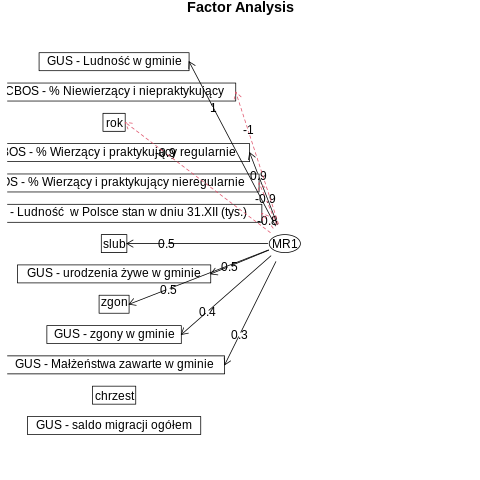

In [39]:
%%R
fa.diagram(EFA_Model)


In [40]:
%%R
summary(EFA_Model$scores)

      MR1         
 Min.   :-1.6840  
 1st Qu.:-0.8731  
 Median : 0.2138  
 Mean   : 0.0000  
 3rd Qu.: 0.9011  
 Max.   : 1.6100  


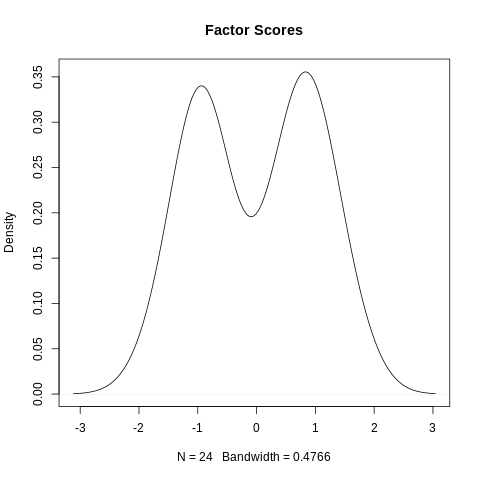

In [41]:
%%R
plot(density(EFA_Model$scores, na.rm = TRUE), 
     main = "Factor Scores")

In [45]:
%%R
N <- nrow(df_PCA)
indices <- seq(1, N)

indices_EFA <- sample(indices, floor((.5*N)))
indices_CFA <- indices[!c(indices %in% indices_EFA)]

fa_EFA <- fa[indices_EFA, ]
fa_CFA <- fa[indices_CFA, ]

R[write to console]: Error in fa[indices_EFA, ] : object of type 'closure' is not subsettable




Error in fa[indices_EFA, ] : object of type 'closure' is not subsettable


RInterpreterError: ignored

#***appendix***

## **SNN**
Spiking neural network was tested to predict orthodox church records, but was deemed unsuccessful due to the small amount of additional supporting data.

In [46]:
X_SNN = df_aggregateddata.iloc[:, df_aggregateddata.columns != "chrzest"]
Y_SNN = df_aggregateddata["chrzest"].values.reshape(-1,1)

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(
 X_SNN, Y_SNN, test_size=0.33, random_state=42)

In [48]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.10, random_state=1)

In [49]:
clf = MLPRegressor(solver='adam', learning_rate='adaptive', alpha=1e-5, activation='relu', hidden_layer_sizes=(5,5,5), random_state=2, max_iter=500, batch_size=62)

In [50]:
clf.fit(X_train, Y_train.flatten())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:612: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  "Got `batch_size` less than 1 or larger than "


MLPRegressor(alpha=1e-05, batch_size=62, hidden_layer_sizes=(5, 5, 5),
             learning_rate='adaptive', max_iter=500, random_state=2)

In [51]:
MSE = mean_squared_error(clf.predict(X_test), Y_test.flatten())
RMSE = np.sqrt(MSE)
RMSE

11.000274428958724

In [52]:
mean_absolute_percentage_error(clf.predict(X_test), Y_test.flatten())

48.56769044391717

In [53]:
R_kw = r2_score(Y_test.flatten(), clf.predict(X_test))
R_kw

-14.440874578405612

In [54]:
clf.predict(X_test)

array([0.21903669, 0.21903669, 0.21903669, 0.21903669, 0.21903669,
       0.21903669, 0.21903669])

In [55]:
print(f'Predicted value of the observation 4 : {clf.predict(X_test)[3]}')

Predicted value of the observation 4 : 0.2190366902292342


In [56]:
Y_test[3]

array([10.])